In [1]:
import os
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
# from this repo:
from functions.utils import get_files
from functions.utils import realign_data, shift_data, find_middle

data_dir = os.path.abspath('../data/simplified_heatmap_data')
output_dir = os.path.abspath('../outputs/heatmaps')
print(data_dir)
print(output_dir)

data_folders = get_files(data_dir + '/*')
#data_files = get_files(data_dir + '/*/*.csv')
#print('There are {} data csv files'.format(len(data_files)))

plt.style.use('seaborn')
plt.rcParams.update({"text.usetex": True})

/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data
/Users/xxie/sample_data/mitchell_sample_images/outputs/heatmaps


## Sanity Checks:

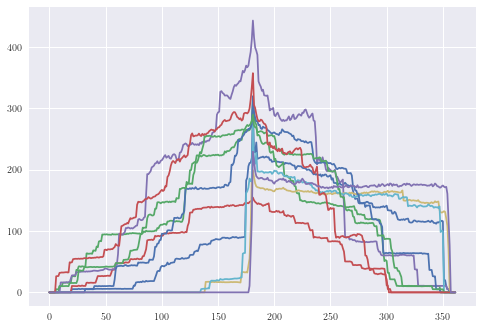

In [2]:
# Set up matplotlib
# ax = plt.figure(figsize = (15,5), constrained_layout = True).subplots(5,1)

# Get folder specific data and split into color channels
data_files = get_files(data_folders[0] + '/*.csv')
cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
assert len(cyan_data)==len(yellow_data)==len(magenta_data)

# Get dims
dims = []
for f in cyan_data:
    df = pd.read_csv(f)
    d = list(df.values.shape)
    dims.append(d)

x = np.array(dims, dtype=int)
max_rows = x[:,0].max()
max_cols = x[:,1].max()

# Pre-allocate array of maximum size
cyan = np.zeros([max_rows, max_cols*2, len(cyan_data)])
# Find middle points for alignment
row_mid = find_middle(cyan[:,0,0])
col_mid = find_middle(cyan[0,:,0])

# Get data into 3D Array
for i, fname in enumerate(cyan_data):
    # Load CSV, skip header (top label row)
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    # remove artifactual frames:
    data = data[:,5:]
    #data = np.delete(data, np.where(data.mean(axis=0)>300), 1)
    # align
    ydiff = row_mid - find_middle(data[:,0])
    for j, row in enumerate(data):
        peak = np.argmax(row)
        xdiff = col_mid - peak
        cyan[ydiff+j, 0 + xdiff:xdiff+len(data[0,:]), i] = row
    # xdiff = col_mid - ref
    ## broadcast into correct positions
    #cyan[ydiff:ydiff + len(data[:,0]), 0 + xdiff:xdiff+len(data[0,:]), i] = data

# plot:
plt.plot(np.mean(cyan, axis=0));

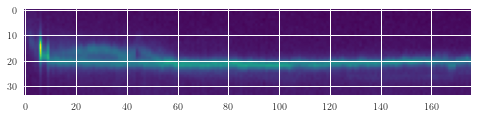

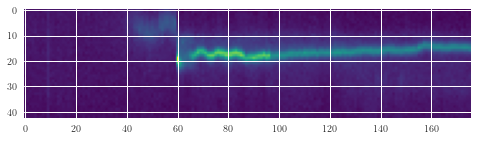

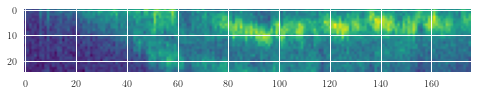

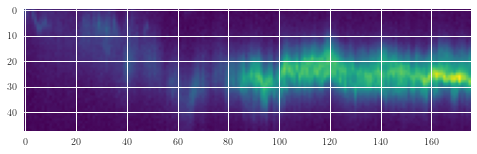

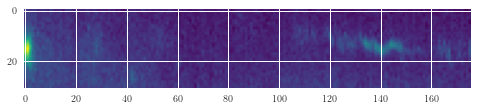

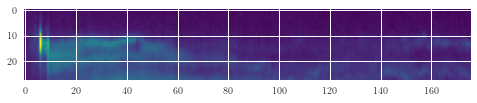

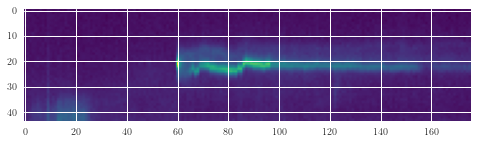

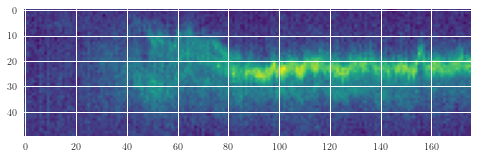

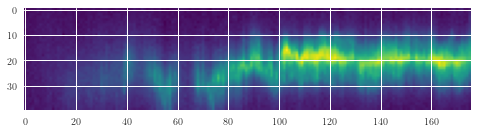

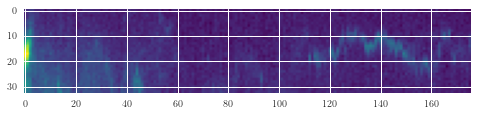

In [3]:
for i, fname in enumerate(cyan_data):
    # Load CSV, skip header (top label row)
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    # remove artifactual frames:
    data = data[:,5:]
    #data = np.delete(data, np.where(data.var(axis=0)>8000), 1)
    #plt.plot(data.var(axis=0))
    plt.imshow(data, cmap = 'viridis');
    plt.pause(1)

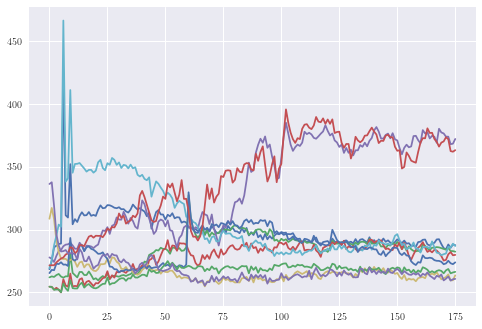

In [5]:
for i, fname in enumerate(cyan_data):
    # Load CSV, skip header (top label row)
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    # remove artifactual frames:
    data = data[:,5:]
    #data = np.delete(data, np.where(data.var(axis=0)>8000), 1)
    plt.plot(data.mean(axis=0))

## Per folder:

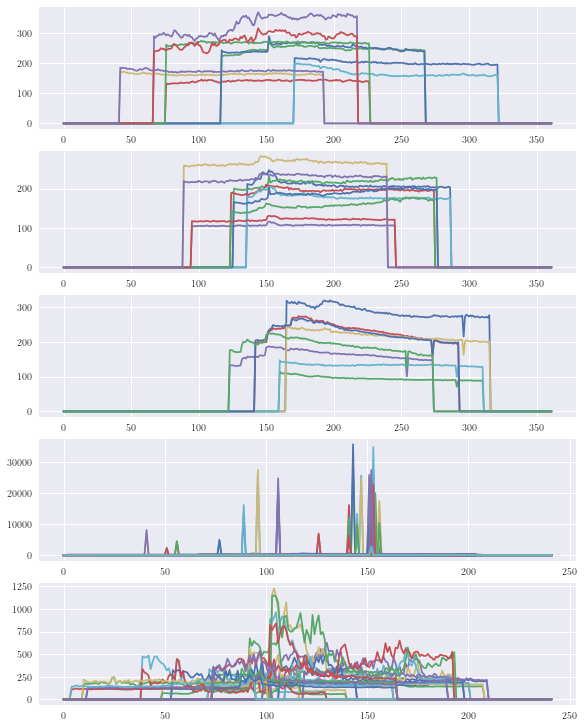

In [6]:
# Set up matplotlib
ax = plt.figure(figsize = (8,10), constrained_layout = True).subplots(5,1)
for m,folder in enumerate(data_folders):
    # Get folder specific data and split into color channels
    data_files = get_files(folder + '/*.csv')
    cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
    yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
    magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
    assert len(cyan_data)==len(yellow_data)==len(magenta_data)
    # Get dims
    dims = []
    for f in cyan_data:
        df = pd.read_csv(f)
        d = list(df.values.shape)
        dims.append(d)

    x = np.array(dims, dtype=int)
    max_rows = x[:,0].max()
    max_cols = x[:,1].max()

    # Pre-allocate array of maximum size
    cyan = np.zeros([max_rows, max_cols*2, len(cyan_data)])
    # Find middle points for alignment
    row_mid = find_middle(cyan[:,0,0])
    col_mid = find_middle(cyan[0,:,0])

    # Get data into 3D Array
    for i, fname in enumerate(cyan_data):
        # Get ref frame, -1 for python indexing
        ref = int(fname.split('/')[-1].split('_')[1].split('-')[1]) - 1
        # Load CSV, skip header (top label row)
        data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
        # remove artifactual frames:
        data = data[:,30:]
        # data = np.delete(data, np.where(data.mean(axis=0)>800), 1)
        # align
        ydiff = row_mid - find_middle(data[:,0])
        xdiff = col_mid - ref
        # broadcast into correct positions
        cyan[ydiff:ydiff + len(data[:,0]), 0 + xdiff:xdiff+len(data[0,:]), i] = data
    
    cyan_mean = np.mean(cyan, axis = 0)
    # cyan_mean = cyan_mean[~np.all(cyan_mean == 0, axis = 0)]

    # plot:
    ax[m].plot(cyan_mean);

## Per Folder Heatmaps:

In [12]:
data_folders

['/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201016_Friday_Plate002_Continuous_Linescans2021315',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_2_Continuous_Linescans2021315',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201106_ICAM_first_N4_second_pHlourin_flask_1_second_replicate_Continuous_Linescans2021315',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201106_ICAM_first_N4_second_pHluorin_flask_1_Continuous_Linescans2021315']

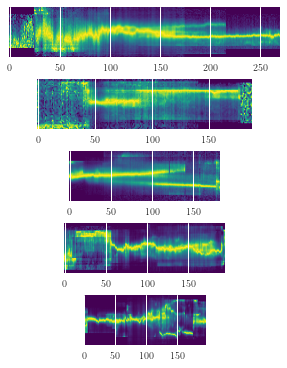

In [6]:
# Set up matplotlib
ax = plt.figure(figsize = (15,5), constrained_layout = True).subplots(5,1)

for m,folder in enumerate(data_folders):
    # Get folder specific data and split into color channels
    data_files = get_files(folder + '/*.csv')
    cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
    yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
    magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
    assert len(cyan_data)==len(yellow_data)==len(magenta_data)
    # Get dims
    dims = []
    for f in cyan_data:
        df = pd.read_csv(f)
        d = list(df.values.shape)
        dims.append(d)

    x = np.array(dims, dtype=int)
    max_rows = x[:,0].max()
    max_cols = x[:,1].max()

    # Pre-allocate array of maximum size
    cyan = np.zeros([max_rows, max_cols*2, len(cyan_data)])
    # Find middle points for alignment
    row_mid = find_middle(cyan[:,0,0])
    col_mid = find_middle(cyan[0,:,0])

    # Get data into 3D Array
    for i, fname in enumerate(cyan_data):
        # Get ref frame, -1 for python indexing
        ref = int(fname.split('/')[-1].split('_')[1].split('-')[1]) - 1
        # Load CSV, skip header (top label row)
        data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
        # remove artifactual frames:
        data = data[:,40:]
        data = np.delete(data, np.where(data.mean(axis=0)>800), 1)
        # align
        ydiff = row_mid - find_middle(data[:,0])
        xdiff = col_mid - ref
        # broadcast into correct positions
        cyan[ydiff:ydiff + len(data[:,0]), 0 + xdiff:xdiff+len(data[0,:]), i] = data

    # Compute means for non-zero entries:
    cyan_mean = np.zeros([max_rows, max_cols*2])
    for i in np.arange(cyan.shape[1]):
        # for every column (frame) slice
        fdat = cyan[:,i,:]
        # compute row-wise mean
        for j, row in enumerate(fdat):
            vals = row[row != 0]
            if vals.any():
                cyan_mean[j,i] = np.mean(vals)
            else:
                cyan_mean[j,i] = 0

    cyan_mean = cyan_mean[:, ~np.all(cyan_mean == 0, axis = 0)]

    # Normalize:
    cyan_norm = np.zeros(cyan_mean.shape)
    for i in np.arange(cyan_mean.shape[1]):
        sevent = cyan_mean[:,i]
        # fevent = sevent.flatten()
        sevent_vals = sevent[sevent != 0]
        nz = np.nonzero(sevent)
        sevent_norm = minmax_scale(sevent_vals)
        cyan_norm[nz,i] = sevent_norm

    # # Normalize:
    # cyan_norm = np.zeros(cyan.shape)
    # for i in np.arange(cyan.shape[2]):
    #     sevent = cyan[:,:,i]
    #     fevent = sevent.flatten()
    #     sevent_vals = fevent[fevent != 0]
    #     nz = np.nonzero(sevent)
    #     sevent_norm = minmax_scale(sevent_vals)
    #     cyan_norm[nz[0],nz[1],i] = sevent_norm

    # # Compute means for non-zero entries:
    # cyan_mean = np.zeros([max_rows, max_cols*2])
    # for i in np.arange(cyan.shape[1]):
    #     # for every column (frame) slice
    #     fdat = cyan_norm[:,i,:]
    #     # compute row-wise mean
    #     for j, row in enumerate(fdat):
    #         vals = row[row != 0]
    #         if vals.any():
    #             cyan_mean[j,i] = np.mean(vals)
    #         else:
    #             cyan_mean[j,i] = 0

    # Slice and squash 0's
    #cyan_norm = cyan_norm[:, ~np.all(cyan_norm == 0, axis = 0)]
    #cyan_mean = cyan_mean[:, ~np.all(cyan_mean == 0, axis = 0)]

    # heatmap:
    ax[m].imshow(cyan_norm, cmap='viridis')
    #ax[m].imshow(cyan_mean, vmin=0, vmax = 0.8)
    ax[m].axes.yaxis.set_ticks([])
    # plt.ylabel('pixels')
    # plt.xlabel('frames')
    # plt.colorbar()

Create Heatmaps per Channel
--

Some sanity checks on the data first:

In [7]:
# split into cyan, yellow, magenta
cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]

# sanity check to make sure they are the same number of files
assert len(cyan_data)==len(yellow_data)==len(magenta_data)
print('There are {} files of each color'.format(len(cyan_data)))

# try numpy arrays with uneven data:
dims = []
for f in cyan_data:
    df = pd.read_csv(f)
    d = list(df.values.shape)
    dims.append(d)

x = np.array(dims, dtype=int)
max_rows = x[:,0].max()
max_cols = x[:,1].max()
print('Most number of rows is {}'.format(max_rows))
print('Most number of columns is {}'.format(max_cols))

There are 34 files of each color
Most number of rows is 81
Most number of columns is 121


## Cyan data in:

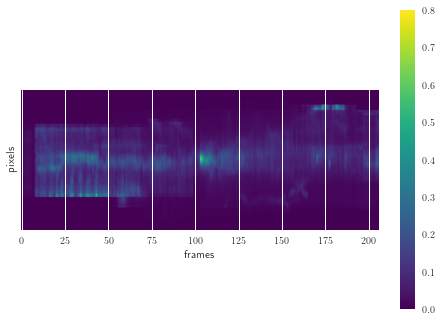

In [9]:
# Pre-allocate array of maximum size
cyan = np.zeros([max_rows, max_cols*2, len(cyan_data)])
# Find middle points for alignment
row_mid = find_middle(cyan[:,0,0])
col_mid = find_middle(cyan[0,:,0])

# Get data into 3D Array
for i, fname in enumerate(cyan_data):
    # Get ref frame, -1 for python indexing
    ref = int(fname.split('/')[-1].split('_')[1].split('-')[1]) - 1
    # Load CSV, skip header (top label row)
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    # remove artifactual frames:
    data = data[:,15:-15]
    data = np.delete(data, np.where(data.mean(axis=0)>800), 1)
    # align
    ydiff = row_mid - find_middle(data[:,0])
    xdiff = col_mid - ref
    # broadcast into correct positions
    cyan[ydiff:ydiff + len(data[:,0]), 0 + xdiff:xdiff+len(data[0,:]), i] = data

# Normalize:
cyan_norm = np.zeros(cyan.shape)
for i in np.arange(cyan.shape[2]):
    sevent = cyan[:,:,i]
    fevent = sevent.flatten()
    sevent_vals = fevent[fevent != 0]
    nz = np.nonzero(sevent)
    sevent_norm = minmax_scale(sevent_vals)
    cyan_norm[nz[0],nz[1],i] = sevent_norm

# Compute means for non-zero entries:
cyan_mean = np.zeros([max_rows, max_cols*2])
for i in np.arange(cyan.shape[1]):
    # for every column (frame) slice
    fdat = cyan_norm[:,i,:]
    # compute row-wise mean
    for j, row in enumerate(fdat):
        vals = row[row != 0]
        if vals.any():
            cyan_mean[j,i] = np.mean(vals)
        else:
            cyan_mean[j,i] = 0

# Slice and squash 0's
cyan_mean = cyan_mean[:,~np.all(cyan_mean == 0, axis = 0)]

plt.imshow(cyan_mean, vmin=0, vmax = 0.8, cmap='viridis')
ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.ylabel('pixels')
plt.xlabel('frames')
plt.colorbar()

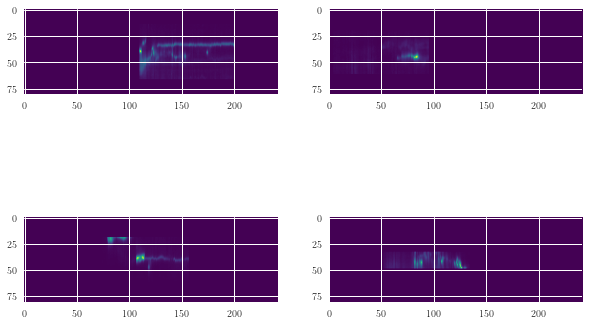

In [10]:
events = [2, 29, 22, 25]
inds = np.arange(4)

axs = plt.figure(figsize=(10,7)).subplots(2,2)
for i in inds:
    plt.subplot(2,2,i+1)
    #plt.imshow(cyan_norm[:,~np.all(cyan_norm[:,:,events[i]] == 0, axis = 0),events[i]])
    plt.imshow(cyan_norm[:,:,events[i]], cmap='viridis')

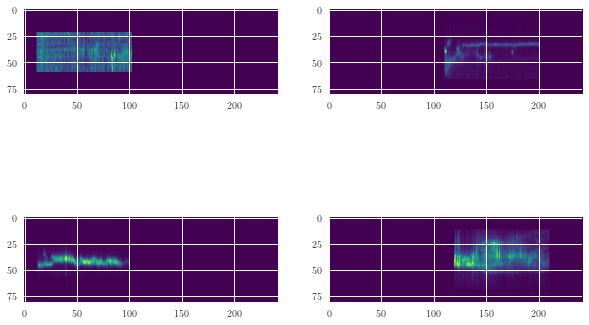

In [11]:
events = [12, 2, 13, 15]
inds = np.arange(4)

axs = plt.figure(figsize=(10,7)).subplots(2,2)
for i in inds:
    plt.subplot(2,2,i+1)
    #plt.imshow(cyan_norm[:,~np.all(cyan_norm[:,:,events[i]] == 0, axis = 0),events[i]])
    plt.imshow(cyan_norm[:,:,events[i]], cmap='viridis')